# Text Preprocessing with Keras

In [5]:
%pip install tensor-sensor

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tensor-sensor: filename=tensor_sensor-1.0-py3-none-any.whl size=26901 sha256=e3fc525e829226565d6bcd5452b15d4c519a48095992c037c6ce0167ce3509a7
  Stored in directory: c:\users\sachi\appdata\local\pip\cache\wheels\34\c0\ba\69e84ca550b05a1b33055176860c8147d2c48385af3c0dcf31
Successfully built tensor-sensor
Note: you may need to restart the kernel to use updated packages.


In [6]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor 
import numpy as np

## Tokenization

In [7]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [8]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [9]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [10]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [11]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [12]:
train_sequence.shape

(1, 9)

In [13]:
train_sample.shape

TensorShape([1, 9, 128])

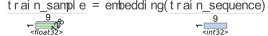

In [33]:
with tsensor.explain(fontname='Arial', dimfontname='Arial'):
    train_sample = embedding(train_sequence)

In [15]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[-0.00562452,  0.01305589, -0.00455732, ...,  0.01123878,
         0.04826926,  0.01263342],
       [-0.02627912,  0.04715185, -0.04329869, ..., -0.03006768,
        -0.03853462, -0.00468228],
       [ 0.04476439,  0.01511185,  0.01473112, ...,  0.02163459,
        -0.04177781, -0.04280427],
       ...,
       [-0.00562452,  0.01305589, -0.00455732, ...,  0.01123878,
         0.04826926,  0.01263342],
       [ 0.02394063, -0.01339819,  0.0111796 , ...,  0.03479258,
         0.02397155,  0.00085073],
       [ 0.01408125,  0.0349609 , -0.00923453, ..., -0.00597566,
         0.01952901,  0.02981326]], dtype=float32)>

## Averaging across tokens

In [16]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 3.59981298e-03,  1.36223966e-02, -8.22304375e-03,
        -8.37735832e-03, -8.00472870e-03,  4.75869514e-03,
         1.04941726e-02,  6.05386868e-03, -3.70028149e-03,
         6.03693863e-03, -5.50002267e-04, -1.61421727e-02,
        -3.52134602e-03, -4.79770824e-03,  4.92553925e-03,
        -7.26788829e-04,  1.81692548e-03,  2.82190647e-02,
        -4.75262571e-03,  2.18304573e-03, -2.22064182e-03,
         2.78063328e-03, -2.10050698e-02, -4.05162899e-03,
        -7.29716895e-03, -1.52169482e-03,  5.18956035e-03,
         9.10917111e-03, -5.32717397e-03,  2.99567776e-03,
         4.55696415e-03,  1.11685293e-02,  1.74868330e-02,
         2.24350542e-02,  5.17972221e-04, -1.10464972e-02,
         3.76610458e-03, -8.76608025e-03, -4.31120954e-03,
        -4.04358841e-03,  2.46304069e-02,  1.95415393e-02,
         6.33082958e-03, -4.60468652e-03, -8.55199900e-03,
         9.07784794e-03,  4.58854530e-03, -2.06373818e-02,
      

![](images/Emb6.png)

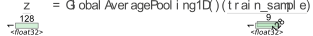

In [34]:
with tsensor.explain(fontname='Arial', dimfontname='Arial'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating Word Embeddings for more than one sentence

In [18]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [19]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [20]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [21]:
MAX_SEQUENCE_LENGTH = 9

In [22]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Embedding Layer

In [23]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [24]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [25]:
X_embedded.shape

TensorShape([6, 9, 128])

In [26]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[-0.00562452,  0.01305589, -0.00455732, ...,  0.01123878,
          0.04826926,  0.01263342],
        [-0.02627912,  0.04715185, -0.04329869, ..., -0.03006768,
         -0.03853462, -0.00468228],
        [ 0.04476439,  0.01511185,  0.01473112, ...,  0.02163459,
         -0.04177781, -0.04280427],
        ...,
        [-0.00562452,  0.01305589, -0.00455732, ...,  0.01123878,
          0.04826926,  0.01263342],
        [ 0.02394063, -0.01339819,  0.0111796 , ...,  0.03479258,
          0.02397155,  0.00085073],
        [ 0.01408125,  0.0349609 , -0.00923453, ..., -0.00597566,
          0.01952901,  0.02981326]],

       [[-0.00484483,  0.04876945,  0.02583616, ...,  0.02623346,
         -0.03399576,  0.02248664],
        [-0.00484483,  0.04876945,  0.02583616, ...,  0.02623346,
         -0.03399576,  0.02248664],
        [-0.00484483,  0.04876945,  0.02583616, ...,  0.02623346,
         -0.03399576,  0.02248664],
        ...,
 

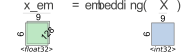

In [35]:
with tsensor.explain(fontname='Arial', dimfontname='Arial'):
    x_em = embedding(X)

In [28]:
X.shape

(6, 9)

In [29]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb6.png)

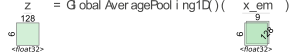

In [36]:
with tsensor.explain(fontname='Arial', dimfontname='Arial'):
    z = GlobalAveragePooling1D()(x_em)

In [31]:
z.shape

TensorShape([6, 128])